## Visualise the enforced gender results

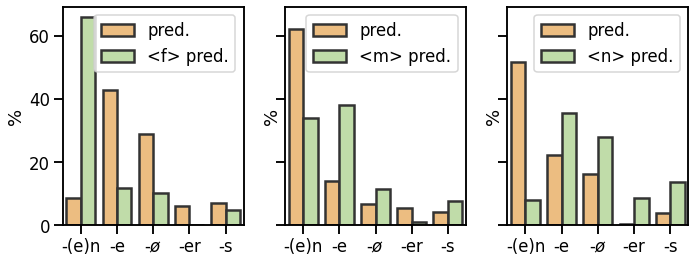

In [17]:
import unidecode
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../wiktionary")
from categorise import categorise
sns.set_context("talk")

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10.5, 8), sharex=True, sharey=True)
tag_names = ["<f>", "<m>", "<n>"]
for i, (ax, tag) in enumerate([(ax1, "fem"), (ax2, "mas"), (ax3, "neut")]):
    tgt_dist, prd_non_dist, prd_fem_dist = Counter(), Counter(), Counter()
    for seed in range(1, 6):
        with open(f"../wiktionary/enforce_gender/wiktionary_val_{tag}-original.src", encoding="utf-8") as f_src,\
             open(f"../wiktionary/enforce_gender/wiktionary_val_{tag}-original.tgt", encoding="utf-8") as f_tgt,\
             open(f"../opennmt/models/seed={seed}_wiktionary/enforce_gender/lstms2s_val_{tag}-original.prd", encoding="utf-8") as f_prd1,\
             open(f"../opennmt/models/seed={seed}_wiktionary/enforce_gender/lstms2s_val_{tag}-{tag}.prd", encoding="utf-8") as f_prd2:
            for src, tgt, prd_non, prd_fem in zip(f_src, f_tgt, f_prd1, f_prd2):
                tgt_label = categorise(src, tgt)
                prd_label = categorise(src, prd_non)
                prd_fem_label = categorise(src, prd_fem)
                tgt_dist[tgt_label] += 1
                prd_non_dist[prd_label] += 1
                prd_fem_dist[prd_fem_label] += 1

    total = sum(tgt_dist.values())
    y = list(tgt_dist.values()) + list(prd_non_dist.values()) + list(prd_fem_dist.values())
    y = [x / total * 100 for x in y]
    x = list(tgt_dist.keys()) + list(prd_non_dist.keys()) + list(prd_fem_dist.keys())
    hue = ["target"] * len(tgt_dist) + \
          ["prediction"] * len(prd_non_dist) + \
          [f"{tag_names[i]} prediction"] * len(prd_fem_dist)
    ax = sns.barplot(x=x, y=y, hue=hue, 
                     palette="Spectral", linewidth=2.5,
                     errcolor=".2", edgecolor=".2", ax=ax)
    plt.xlabel("suffix class")
    ax.set_ylabel("%")
    plt.xlim(-0.5, 4.5)
    ax.set_yticks([0, 20, 40, 60])
    ax.set_xticklabels(["-(e)n", "-e", r"-$\o$", "-er", "-s", "", ""])
    
plt.savefig(f"figures/enforce_gender.pdf", bbox_inches="tight")
plt.show()